## How many individual calls reach a block of content that is not the digest or menu?

by Jack Wright

This notebook defines a function that will return the percent of callers from a country that reach a block of content that is not a menu or digest

NOTE:

the majority of the calls have no tag, it is not a `NULL` it is just an empty string. this needs to be filtered out. 

In [17]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'



## Structure of the `block_tags`



In [18]:

query = """
SELECT
*
FROM `viamo-datakind.datadive.321_sessions_1122`

ORDER BY RAND()
LIMIT 1000
"""

test_df = pd.read_gbq(query)

<AxesSubplot:>

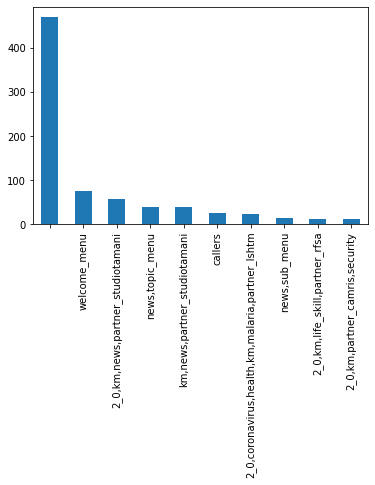

In [22]:

block_tags = test_df.block_tags.unique()

#histogram of top 10 block tags
test_df.block_tags.value_counts().head(10).plot(kind='bar')


['2_0,km' '' 'welcome_menu'
 '2_0,coronavirus,health,km,malaria,partner_lshtm'
 '2_0,entreprenuership,financial,km,partner_aecom,partner_rfsa'
 '2.0,km,news,partner_vision_group' 'kq,partner_hirondelle'
 'news,topic_menu' 'family_planning_methods,fp_rh,health,km,partner_psi'
 '2_0,km,life_skill,partner_rfsa' 'fp_rh,health,km,partner_psi' 'callers'
 '2_0,km,news,partner_studiotamani' 'health,kq,partner_raes'
 'age,registration' 'health,km,malaria,partner_hch,partner_psi'
 'km,news,partner_studiotamani' '2_0,financial,km,partner_aecom'
 'health,theme_menu' 'ag,maize,topic_menu'
 '2_0,km,partner_camris,security' '2_0,fp_rh,km'
 '2_0,ed,km,partner_camris' 'drama,theme_menu'
 'fp_rh,health,km,partner_hch'
 '2_0,health,km,nutrition,partner_hki,partner_rfsa'
 '2_0,child_labour,child_rights,km,partner_bit,rights'
 'callers,lang_selector' '2_0,health,km,nutrition,partner_gret'
 'health,partner_raes'
 '2_0,health,km,nutrition,partner_hki,partner_rfsa,wash'
 'coronavirus,kq,kq3,partner_giz,projec

In [28]:
#block tags that contain digest or menu
digest_menu = test_df[test_df.block_tags.str.contains('digest', case=False)]

print(digest_menu['block_tags'])



0                                               2_0,km
1                                                     
2                                         welcome_menu
3      2_0,coronavirus,health,km,malaria,partner_lshtm
4                                                     
                            ...                       
995            partner_earth_networks,sub_menu,weather
996                                                   
997       gender,partner_camris,partner_hch,theme_menu
998                                  health,theme_menu
999                                       welcome_menu
Name: block_tags, Length: 1000, dtype: object


my plan is to query the db for a count of calls that contain a digest or menu and then return a percentage. 

In [ ]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'



In [13]:
def menu_digest_percentage(country):
    country = '"'+country+'"'
    query = """
SELECT
count(block_tags) as count
FROM `viamo-datakind.datadive.321_sessions_1122`
WHERE
organization_country = {}
AND
((block_tags LIKE '%menu%')
OR (block_tags LIKE '%digest%'))

""".format(country)
    df =pd.read_gbq(query)
    md = df['count'].values[0]
    query = """
SELECT
count(*) as count
FROM `viamo-datakind.datadive.321_sessions_1122`
WHERE
organization_country = {}
""".format(country)
    df =pd.read_gbq(query)
    t = df['count'].values[0]
    return md/t

In [14]:
# connect to the database using the credentials
import os
import pandas as pd
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'credentials.json'

uganda = menu_digest_percentage('Uganda')
mali = menu_digest_percentage('Mali')
nigeria = menu_digest_percentage('Nigeria')

In [16]:
print('Uganda: ', 1 - uganda, 'Mali: ', 1 - mali, 'Nigeria: ', 1 - nigeria)

Uganda:  0.8243427508042946 Mali:  0.8125000766747352 Nigeria:  0.8738774791449566
